# Ternary model analysis

This notebook loads the most recent trained models, shows leaderboards, metrics, and renders plots (feature importance, confusion matrices).

In [1]:
from pathlib import Path
import pandas as pd
from IPython.display import display, Markdown, Image

# Paths
ROOT = Path.cwd().parent  # notebooks -> upreg_classify
MODELS = ROOT / 'models' / 'multiclass_ag'
FIGS = ROOT / 'reports' / 'figures' / 'multiclass'

print(f"Models dir: {MODELS}")
print(f"Figures dir: {FIGS}")

assert MODELS.exists(), f"Missing models directory: {MODELS}"
assert FIGS.exists(), f"Missing figures directory: {FIGS}"

Models dir: c:\PythonProjects\rl_reserve_markets\upreg_classify\models\multiclass_ag
Figures dir: c:\PythonProjects\rl_reserve_markets\upreg_classify\reports\figures\multiclass


In [2]:
# Load predictor and show leaderboard
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor.load(MODELS)
display(Markdown('### Leaderboard'))
try:
    lb = predictor.leaderboard(silent=True)
    display(lb)
except Exception as e:
    print("leaderboard() failed:", e)

### Leaderboard

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.597574,f1_macro,3.583422,46.329295,0.002963,0.437476,2,True,9
1,WeightedEnsemble_L3,0.597574,f1_macro,3.584465,46.498658,0.004006,0.606839,3,True,16
2,NeuralNetFastAI_BAG_L1,0.590492,f1_macro,1.798174,24.485161,1.798174,24.485161,1,True,8
3,RandomForestEntr_BAG_L1,0.571232,f1_macro,0.314381,3.443086,0.314381,3.443086,1,True,2
4,ExtraTreesN800_BAG_L1,0.566368,f1_macro,0.540660,1.920158,0.540660,1.920158,1,True,7
5,RandomForestGini_BAG_L1,0.562455,f1_macro,0.290553,2.418596,0.290553,2.418596,1,True,1
6,ExtraTreesEntr_BAG_L1,0.561414,f1_macro,0.429111,1.532555,0.429111,1.532555,1,True,6
7,ExtraTreesGini_BAG_L1,0.559035,f1_macro,0.456643,1.434991,0.456643,1.434991,1,True,5
8,RandomForestN800_BAG_L1,0.554362,f1_macro,0.628915,10.007676,0.628915,10.007676,1,True,4
9,RandomForestN400_BAG_L1,0.545193,f1_macro,0.322157,7.060228,0.322157,7.060228,1,True,3


In [3]:
# Read and display metrics and classification reports
import json

display(Markdown('### Metrics table'))
metrics_csv = MODELS / 'metrics.csv'
if metrics_csv.exists():
    metrics_df = pd.read_csv(metrics_csv)
    display(metrics_df)
else:
    print('metrics.csv not found:', metrics_csv)

for split in ['val', 'test']:
    rpt = MODELS / f'{split}_classification_report.txt'
    if rpt.exists():
        display(Markdown(f'### {split.title()} classification report'))
        print(rpt.read_text())


for split in ['val', 'test']:
    cm = MODELS / f'{split}_confusion_matrix.csv'
    if cm.exists():
        display(Markdown(f'### {split.title()} confusion matrix'))
        display(pd.read_csv(cm, index_col=0))

### Metrics table

,val_f1_macro,val_accuracy,test_f1_macro,test_accuracy
0,0.624874,0.693742,0.580388,0.628521


### Val classification report

              precision    recall  f1-score   support

        down       0.74      0.64      0.69      4987
        none       0.70      0.77      0.73      6445
          up       0.46      0.44      0.45      1064

    accuracy                           0.69     12496
   macro avg       0.63      0.62      0.62     12496
weighted avg       0.70      0.69      0.69     12496



### Test classification report

              precision    recall  f1-score   support

        down       0.72      0.54      0.62      5277
        none       0.60      0.76      0.67      5775
          up       0.49      0.42      0.45      1444

    accuracy                           0.63     12496
   macro avg       0.60      0.57      0.58     12496
weighted avg       0.64      0.63      0.62     12496



### Val confusion matrix

,1670,103
3214,,
1007,4982,456
130,461,473


### Test confusion matrix

,2210,209
2858,,
956,4391,428
153,686,605


In [4]:
# I want to see how many transitions from 'down' to 'up' were correctly captured

In [5]:
# open reports/dataframes/multiclass_dataset.csv
df = pd.read_csv(ROOT / 'reports' / 'dataframes' / 'multiclass_dataset.csv')
print(len(df), "rows in multiclass_dataset.csv")
df.head(2)

37488 rows in multiclass_dataset.csv


,NO1-NO2_ratio,NO1-NO3_ratio,NO1-NO5_ratio,NO1-SE3_ratio,RegLag-4,RegLag-6,RegLag-8,RegLag-10,RegLag-12,Persistency,RegClass+4
0,0.466809,0.36766,0.086446,0.869761,0,0,0,0,0,0,none
1,0.466809,0.36766,0.086446,0.869761,0,0,0,0,0,0,none


## Feature importance (top 30)

,feature,importance
0,Persistency,0.284428
1,NO1-NO5_ratio,0.013060
2,NO1-NO2_ratio,0.010724
3,NO1-NO3_ratio,0.007000
4,RegLag-8,0.006911
5,RegLag-10,0.006822
6,NO1-SE3_ratio,0.005591
7,RegLag-12,0.004947
8,RegLag-6,0.000012
9,RegLag-4,-0.003510


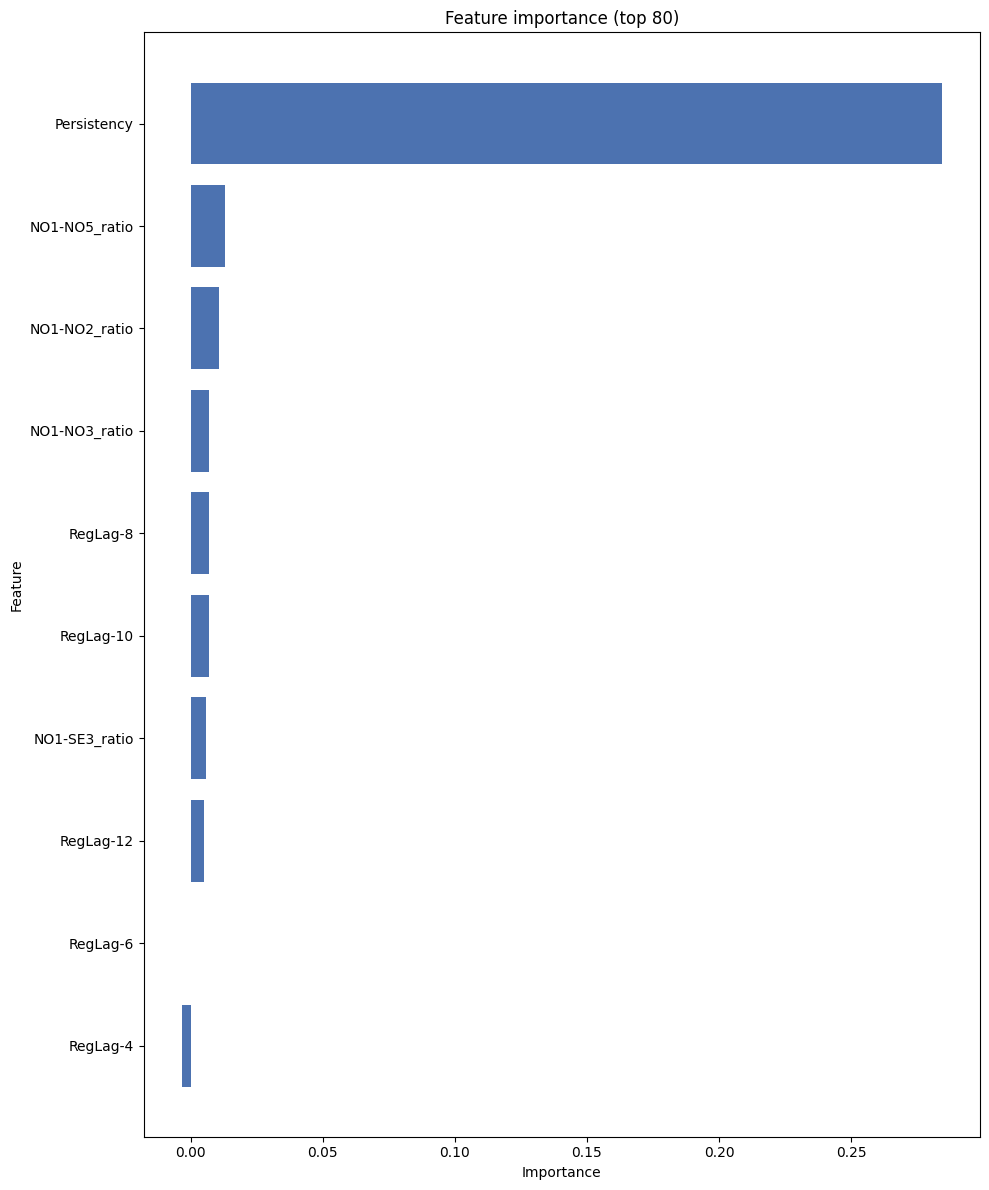

In [6]:
from IPython.display import Markdown, display
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Show feature importance once using the saved artifact if available,
# otherwise compute quickly as a fallback
fi_csv_path = (MODELS / "feature_importance.csv")
fi_df = None

if fi_csv_path.exists():
    fi_df = pd.read_csv(fi_csv_path)
else:
    try:
        from autogluon.tabular import TabularPredictor
        # Use existing predictor if present, otherwise load it
        predictor = predictor if 'predictor' in globals() else TabularPredictor.load(MODELS)
        # Try to load a cached dataset snapshot for FI; fall back to predictor's training data
        df_path = ROOT / 'reports' / 'dataframes' / 'multiclass_dataset.csv'
        if df_path.exists():
            eval_df = pd.read_csv(df_path)
            # Restrict to model features and drop label
            label = predictor.label
            feature_cols = [c for c in eval_df.columns if c != label and c in predictor.features()]
            eval_df = eval_df[feature_cols].dropna()
        else:
            # If no dataset snapshot, use predictor's training data
            eval_df = predictor.load_data_internal('train')[0]
        # Compute a fast FI with a short time limit
        fi_df = predictor.feature_importance(eval_df, time_limit=30)
    except Exception as e:
        fi_df = None
        print('Feature importance unavailable:', e)

if fi_df is not None and len(fi_df):
    # Normalize schema: ensure a 'feature' column is present
    tmp = fi_df.copy()
    if 'feature' not in tmp.columns:
        if 'Unnamed: 0' in tmp.columns:
            tmp = tmp.rename(columns={'Unnamed: 0': 'feature'})
        else:
            tmp = tmp.reset_index()
            if 'index' in tmp.columns:
                tmp = tmp.rename(columns={'index': 'feature'})
    # Ensure importance column exists
    if 'importance' not in tmp.columns and 'score' in tmp.columns:
        tmp = tmp.rename(columns={'score': 'importance'})

    # Display a single table (top 30)
    top_table = tmp.sort_values('importance', ascending=False).head(100)
    display(Markdown('## Feature importance (top 30)'))
    display(top_table[['feature', 'importance']])

    # Plot a single bar chart (top 80)
    top_plot = tmp.sort_values('importance', ascending=False).head(80)
    plt.figure(figsize=(10, 12))
    plt.barh(top_plot['feature'][::-1], top_plot['importance'][::-1], color='#4C72B0')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature importance (top 80)')
    plt.tight_layout()
    plt.show()
else:
    display(Markdown('## Feature importance unavailable'))


# Imbalance vs. Spot Price

== Class counts and correct predictions ==
true up:     1444 | pred up:     1242 | correct up:      605
true down:   5277 | pred down:   3967 | correct down:   2858
true none:   5775 | pred none:   7287 | correct none:   4391

== Precision/Recall/F1 per class ==
              precision    recall  f1-score   support

          up       0.49      0.42      0.45      1444
        down       0.72      0.54      0.62      5277
        none       0.60      0.76      0.67      5775

    accuracy                           0.63     12496
   macro avg       0.60      0.57      0.58     12496
weighted avg       0.64      0.63      0.62     12496


negatives in UP spread: 0
positives in DOWN spread: 0
--- Up Price - DA | correct UP (delivery) (n=605) ---
mean=34.64, std=80.47, min=0.06, max=870.54
quantiles:
0.05     3.140
0.25    12.600
0.50    19.910
0.75    33.190
0.95    63.364
--- Down Price - DA | correct DOWN (delivery) (n=2858) ---
mean=-20.01, std=13.78, min=-85.41, max=0.00
quantiles:
0.

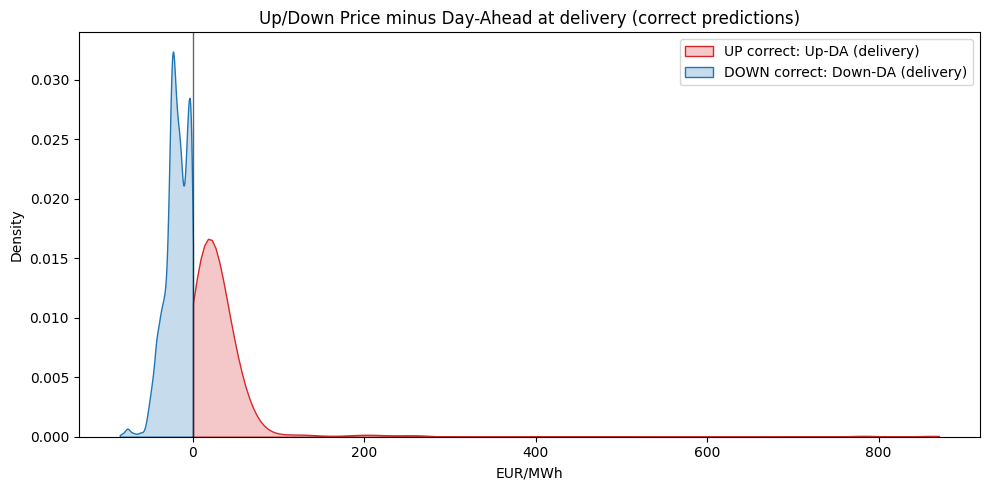

In [7]:
# Up/Down price minus spot (DA) for correct predictions + classification counts
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# --- paths ---
REPO_ROOT = os.path.abspath(os.path.join('..'))
DATA_DIR = os.path.join(REPO_ROOT, 'data', 'raw')
MODEL_DIR = os.path.join(REPO_ROOT, 'models', 'multiclass_ag')  # adjust if different

SPLIT = 'test'  # 'val' or 'test'
PRED_FILE = os.path.join(MODEL_DIR, f'{SPLIT}_predictions.csv')

# --- load predictions ---
if not os.path.exists(PRED_FILE):
    raise FileNotFoundError(f'Missing predictions file: {PRED_FILE}')
preds = pd.read_csv(PRED_FILE, index_col=0, parse_dates=True)
preds.index.name = 'Time'
label_col = preds.columns[0]  # e.g., 'RegClass+4'
pred_col = 'pred'
if pred_col not in preds.columns:
    raise ValueError("Expected 'pred' column in predictions CSV")

# Quick counts and confusion summary (uses full predictions, no joins)
y_true = preds[label_col]
y_pred = preds[pred_col]

correct_up = int(((y_pred == 'up') & (y_true == 'up')).sum())
correct_down = int(((y_pred == 'down') & (y_true == 'down')).sum())
correct_none = int(((y_pred == 'none') & (y_true == 'none')).sum())

n_true_up = int((y_true == 'up').sum())
n_true_down = int((y_true == 'down').sum())
n_true_none = int((y_true == 'none').sum())

n_pred_up = int((y_pred == 'up').sum())
n_pred_down = int((y_pred == 'down').sum())
n_pred_none = int((y_pred == 'none').sum())

print('== Class counts and correct predictions ==')
print(f"true up:   {n_true_up:6d} | pred up:   {n_pred_up:6d} | correct up:   {correct_up:6d}")
print(f"true down: {n_true_down:6d} | pred down: {n_pred_down:6d} | correct down: {correct_down:6d}")
print(f"true none: {n_true_none:6d} | pred none: {n_pred_none:6d} | correct none: {correct_none:6d}")

print('\n== Precision/Recall/F1 per class ==')
print(classification_report(y_true, y_pred, labels=['up','down','none'], zero_division=0))

# --- load BalanceMarket prices (Up/Down) ---
def load_balance_market_prices(data_dir: str, include_2024: bool = True) -> pd.DataFrame:
    bm_2025 = os.path.join(data_dir, 'BalanceMarket_2025_NO1_EUR_None_MW.csv')
    bm_2024 = os.path.join(data_dir, 'BalanceMarket_2024_NO1_EUR_None_MW.csv')
    df = pd.read_csv(bm_2025, delimiter=';')
    if include_2024:
        df24 = pd.read_csv(bm_2024, delimiter=';')
        df = pd.concat([df24, df], ignore_index=True)
    df.rename(columns={"Delivery Start (CET)": "Time"}, inplace=True)
    df['Time'] = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S')
    df.set_index('Time', inplace=True)
    df = df[~df.index.duplicated(keep='first')].sort_index()
    # Ensure numeric
    for col in ['NO1 Up Price (EUR)', 'NO1 Down Price (EUR)']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df[['NO1 Up Price (EUR)', 'NO1 Down Price (EUR)']]

bm = load_balance_market_prices(DATA_DIR, include_2024=True)

# --- load Day-Ahead (spot proxy) ---
def load_day_ahead_price(data_dir: str, include_2024: bool = True) -> pd.DataFrame:
    da_2025 = os.path.join(data_dir, 'AuctionPrice_2025_DayAhead_NO1_EUR_None.csv')
    da_2024 = os.path.join(data_dir, 'AuctionPrice_2024_DayAhead_NO1_EUR_None.csv')
    da = pd.read_csv(da_2025, delimiter=';')
    if include_2024:
        da24 = pd.read_csv(da_2024, delimiter=';')
        da = pd.concat([da24, da], ignore_index=True)
    da['Delivery Start (CET)'] = pd.to_datetime(da['Delivery Start (CET)'], format='%d.%m.%Y %H:%M:%S')
    da.rename(columns={"Delivery Start (CET)": "Time"}, inplace=True)
    da.set_index('Time', inplace=True)
    da.sort_index(inplace=True)
    da.drop_duplicates(inplace=True)
    col = 'NO1 Price (EUR)'
    da[col] = pd.to_numeric(da[col].replace('', np.nan), errors='coerce')
    da = da[~da.index.duplicated(keep='first')].resample('15min').ffill().bfill()
    da.rename(columns={col: 'DA Price'}, inplace=True)
    return da[['DA Price']]

da = load_day_ahead_price(DATA_DIR, include_2024=True)

# --- align and compute delivery-time spreads ---
df = preds[[label_col, pred_col]].join(bm, how='left').join(da, how='left')
# Move to delivery (t+4) to match label horizon
for c in ['NO1 Up Price (EUR)', 'NO1 Down Price (EUR)', 'DA Price']:
    if c in df.columns:
        df[c + ' @delivery'] = df[c].shift(-4)

# Masks for correct predictions
is_up_correct = (df[pred_col] == 'up') & (df[label_col] == 'up')
is_down_correct = (df[pred_col] == 'down') & (df[label_col] == 'down')

# Spreads at delivery
df['Up-DA Spread @delivery'] = df['NO1 Up Price (EUR) @delivery'] - df['DA Price @delivery']
df['Down-DA Spread @delivery'] = df['NO1 Down Price (EUR) @delivery'] - df['DA Price @delivery']

# Percentage change for UP relative to DA at delivery (guard against zero/near-zero DA)
eps = 1e-6
valid_da = (df['DA Price @delivery'].abs() > eps) & (df['DA Price @delivery'] > 20)
up_pct = (df['Up-DA Spread @delivery'] / df['DA Price @delivery']).where(valid_da) * 100.0

spread_up = df.loc[is_up_correct, 'Up-DA Spread @delivery'].dropna()
spread_down = df.loc[is_down_correct, 'Down-DA Spread @delivery'].dropna()
up_pct_correct = up_pct.loc[is_up_correct].dropna()

# Sanity checks
print('\nnegatives in UP spread:', int((spread_up < 0).sum()))
print('positives in DOWN spread:', int((spread_down > 0).sum()))

# --- summarize helper (restored) ---
def summarize(name: str, s: pd.Series) -> None:
    """Print count, mean/std/min/max and key quantiles for a Series."""
    if s is None or len(s) == 0:
        print(f"{name}: no data")
        return
    n = len(s)
    mean = s.mean()
    std = s.std()
    s_min, s_max = s.min(), s.max()
    q = s.quantile([0.05, 0.25, 0.50, 0.75, 0.95])
    print(f"--- {name} (n={n}) ---")
    print(f"mean={mean:.2f}, std={std:.2f}, min={s_min:.2f}, max={s_max:.2f}")
    print("quantiles:")
    print(q.to_string())

# Print summaries again
summarize('Up Price - DA | correct UP (delivery)', spread_up)
summarize('Down Price - DA | correct DOWN (delivery)', spread_down)
summarize('UP % change vs DA | correct UP (delivery) [percent]', up_pct_correct)

# Visualization (boundary-aware KDE)
plt.figure(figsize=(10,5))
sns.kdeplot(spread_up, fill=True, color='#d62728', label='UP correct: Up-DA (delivery)', clip=(0, None), cut=0, bw_adjust=0.8)
sns.kdeplot(spread_down, fill=True, color='#1f77b4', label='DOWN correct: Down-DA (delivery)', clip=(None, 0), cut=0, bw_adjust=0.8)
plt.axvline(0, color='k', lw=1, alpha=0.6)
plt.title('Up/Down Price minus Day-Ahead at delivery (correct predictions)')
plt.xlabel('EUR/MWh')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
display(Markdown('## Transitions captured from none to up/down'))

# Transitions captured: none -> up / none -> down from t+3 to t+4
import pandas as pd

# y_true is RegClass+4 at index t (class at t+4). Previous step (t+3) is y_true shifted by +1 index.
prev_true = y_true.shift(1)

# Masks for transitions from 'none' at t+3 to target at t+4
none_to_up = prev_true.eq('none') & y_true.eq('up')
none_to_down = prev_true.eq('none') & y_true.eq('down')

# Captured by model (predicted correctly at t+4)
captured_up = (none_to_up & y_pred.eq('up')).sum()
cap_total_up = int(none_to_up.sum())
up_pct = (captured_up / cap_total_up * 100.0) if cap_total_up else 0.0

captured_down = (none_to_down & y_pred.eq('down')).sum()
cap_total_down = int(none_to_down.sum())
down_pct = (captured_down / cap_total_down * 100.0) if cap_total_down else 0.0

print(f"None -> Up captured: {captured_up}/{cap_total_up} ({up_pct:.1f}%)")
print(f"None -> Down captured: {captured_down}/{cap_total_down} ({down_pct:.1f}%)")


## Transitions captured from none to up/down

None -> Up captured: 67/333 (20.1%)
None -> Down captured: 187/691 (27.1%)


### NUCS API quick tips

- Replace `https://<NUCS>` with the actual host you were provided (no angle brackets).
- Use the raw `securityToken` value; do not wrap it in `<` and `>`.
- Requests will URL-encode query parameters for you; pass them as a dict.
- Time can be specified via `timeInterval` (ISO 8601 start/end) or `periodStart`/`periodEnd` depending on the dataset.
- Common parameters:
  - `documentType`: A81 (DF09), A89 (DF11), A15 (DF14), A38 (DF16+DF28), A26 (DF18), A44 (DF19)
  - `processType`: A51 (aFRR), A47 (mFRR)
  - `type_marketagreement.type`: A01/A02/A03/A04/A06/A13 (Daily/Weekly/Monthly/Yearly/Long-term/Hourly)
  - `controlArea_domain` or `area_Domain`: EIC (e.g., 10YDK-1--------W)
  - `acquiring_Domain`/`connecting_Domain` or `in_Domain`/`out_Domain` for cross-zonal docs

Once you set `base_url` and `token`, flip `RUN_NUCS=True` in the cell above and re-run to fetch data.
